# Feature Selection and Initial Cleaning

For the initial feature selection and cleaning, I go column by column and make an initial decision if that <br>
column(feature) will be of value to the analysis for this project. I will then clean each column as I proceed <br>
through the data set. <br>

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import the datset for cleaning 
def import_and_create_df():

    file = ('../data/main_data_not_cleaned.csv')
    
    # create data frame
    frame = pd.read_csv(file)
    df = frame.copy()

    return df

As the data set already contains the Fighters name in Fighter_1 and Fighter_2 columns<br>
The first and last name columns wont be needed.<br>
<br>
We wont be performing any analysis on the Nicknames either and they dont hold<br>
any value when computing other possible features so it can also be removed.<br>

In [3]:
# remove the initial uneeded features from the dataset
def remove_initial_features():
    # create dataframe 
    frame = import_and_create_df()
    df = frame.copy()
    
    # remove columns that aren't needed
    df.drop(['First Name F_1', 'First Name F_2',
             'Last Name F_1', 'Last Name F_2',
             'Nickname F_1', 'Nickname F_2'] , axis=1, inplace=True)
    
    return df

## WEIGHT CLASSES

For the weight classes, the UFC changed rules and weight classes from its beginging inception in 1996 to a more unified <br>
approach in 1999/2000 for this reason some weight classes are not used any more, such as the Open weight class. <br>
Initial investigation into whether it would be useful in analysis of fights since rule changes.

In [4]:
# create copy of the initial data frame
weight_classes_df = remove_initial_features().copy()

In [5]:
# count the fights per weight class
weight_class_count_fights_df = weight_classes_df.groupby('Weight class')['Weight class'].count()
weight_class_count_fights_df

Weight class
Bantamweight              510
Catch Weight               41
Featherweight             587
Flyweight                 242
Heavyweight               610
Light Heavyweight         589
Lightweight              1141
Middleweight              862
Open Weight               117
Super Heavyweight           1
Welterweight             1120
Women's Bantamweight      160
Women's Featherweight      18
Women's Flyweight         140
Women's Strawweight       212
Name: Weight class, dtype: int64

### Open Weight Class

Open weight class was used in the early days of the UFC promotions as fighters where not seperated<br>
by their weight like today's Mixed Martial Arts promotions.<br>
We can check the last time Open weight class was used in the UFC. 

In [6]:
# create fitered dataframe for the max date in open weight class fights
check_open_weight = weight_classes_df[weight_classes_df['Weight class'] == 'Open Weight']

# check we have the correct number of fights
print('Open weight fights: ' + str(len(check_open_weight)))

Open weight fights: 117


In [7]:
# print the last time Open weight was used as a weight class
print('Last date Open weight was used in UFC: ' + str(check_open_weight['Date'].max()))

Last date Open weight was used in UFC: 1999-11-19


In [8]:
# Open weight as a % of all fights
op_count = len(check_open_weight)
all_count = len(weight_classes_df)
percent_of_fights = round((op_count / all_count)*100,2)
print('Open Weight Class as % of all UFC fights: '+ str(percent_of_fights) +'%')


Open Weight Class as % of all UFC fights: 1.84%


Open weight hasn't been used in the UFC since 19th of November 1999, Almost 22 years.<br>
For the purposes of this analysis under the current rules of Mixed Martial Arts<br> 
I don't believe open weight class would be appropriate in the data set and only accounts for 1.84% of all fights

In [9]:
# filter out open weight class
weight_classes_df = weight_classes_df[weight_classes_df['Weight class'] != 'Open Weight']

### Super Heavy Weight

From above, Super heavy weight has only ever had one fight. Check to see when it was.<br>

In [10]:
# create fitered dataframe for the max date in Super Heavyweight class fights
check_shw = weight_classes_df[weight_classes_df['Weight class'] == 'Super Heavyweight']

# check we have the correct number of fights
print('Super Heavyweight fights: ' + str(len(check_shw)))


Super Heavyweight fights: 1


In [11]:
# print the last time Super Heavyweight was used as a weight class
print('Last date Super Heavyweight was used in UFC: ' + str(check_shw['Date'].max()))

Last date Super Heavyweight was used in UFC: 2000-11-17


In [12]:
# Super Heavyweight as a % of all fights
shw_count = len(check_shw)
all_count = len(weight_classes_df)
percent_of_fights = round((shw_count / all_count)*100,2)
print('Super Heavyeight Class as % of all UFC fights: '+ str(percent_of_fights) +'%')

Super Heavyeight Class as % of all UFC fights: 0.02%


Super Heavyweight only accounts for one fight in the UFC and was almost 21 years ago.<br>
With the Open weight class removed Super Heavyweight still only accounts for 0.02% of UFC fights <br>
As the weight class is not used in the modern rules of the UFC I don't believe it has any value in the analysis.<br>
It can be removed.

In [13]:
# filter out Super Heavyweight class
weight_classes_df = weight_classes_df[weight_classes_df['Weight class'] != 'Super Heavyweight']

With Open class and Super Heavy weight removed from the dataset we can see the distribution of <br>
fights left across the remaining weight classes.

In [14]:
# create function to plot the bar graph and export png
def plot_bar(frame,img_name, items):
    count = frame.groupby(items)[items].count()
    count  = count.to_frame()
    count.rename(columns={items:'Count'}, inplace=True)
    count.reset_index(inplace = True)

    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')
    
    bar_x = count[items]
    bar_y = count['Count']
    bar_plot = plt.bar(bar_x, bar_y)
    plt.xticks(rotation=90)
    plt.title(items)
    plt.ylabel('Number of Fights')
    

    
    def sum_label(rec):
        for idx,rec in enumerate(bar_plot):
            height = rec.get_height()
            ax.text(rec.get_x() + rec.get_width()/2., height,
                    bar_y[idx],
                    ha='center', va='bottom', rotation=0)
    
    sum_label(bar_plot)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.savefig('../graphs/'+ 
                img_name +'.png', bbox_inches="tight", dpi=150)
    
    plt.show()
    plt.clf()
    plt.close()
    

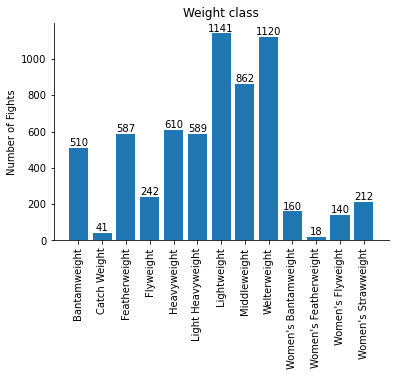

In [15]:
# plot the bar graph
plot_bar(weight_classes_df, 'Weight Classes', 'Weight class')

## WIN TYPES

Win types are the type of decision in the "Win decided by" column, some of these can be split out to make<br>
the features easier to clean up and analyse later.<br>

In [16]:
# Create data frame for exploring the win types
df_win_types = weight_classes_df.copy()

In [17]:
df_win_types.head()

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
0,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Light Heavyweight,Glover Teixeira,Jan Blachowicz,SUB,Rear Naked Choke,2,182,Glover Teixeira,...,6.0,6.0,2.0,2.0,26.0,43.0,1.0,1.0,1.0,1.0
1,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Bantamweight,Petr Yan,Cory Sandhagen,U-DEC,NaN,5,300,Petr Yan,...,28.0,32.0,23.0,24.0,168.0,443.0,1.0,2.0,0.0,0.0
2,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Lightweight,Islam Makhachev,Dan Hooker,SUB,Kimura,1,145,Islam Makhachev,...,0.0,0.0,3.0,3.0,4.0,13.0,0.0,0.0,0.0,0.0
3,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Heavyweight,Alexander Volkov,Marcin Tybura,U-DEC,NaN,3,300,Alexander Volkov,...,15.0,17.0,4.0,5.0,47.0,121.0,11.0,18.0,0.0,0.0
4,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Welterweight,Khamzat Chimaev,Li Jingliang,SUB,Rear Naked Choke,1,196,Khamzat Chimaev,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


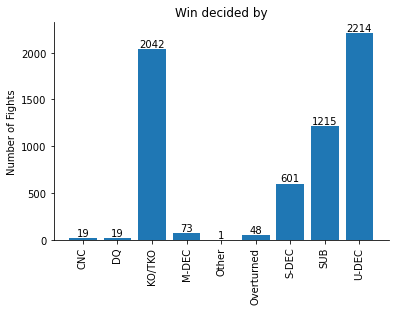

In [18]:
# plot the win types
plot_bar(df_win_types, 'Win Types','Win decided by' )

#### Decision Types Cleaning: Part 1

Because the decisions types are seperated out by U-DEC, M-DEC and S-DEC I'll combine these into one level Decision and <br>
move the U(Unanimous), M(Majority) and S(Split) into the Win Method column

In [19]:
# Convert the Win decided by to Decision and make additions to the Win Method Column 

df_win_types['Win Method'] = np.where(df_win_types['Win decided by']=='M-DEC',
                                      'Majority Decision',
                                      df_win_types['Win Method'])

df_win_types['Win Method'] = np.where(df_win_types['Win decided by']=='S-DEC',
                                      'Split Decision',
                                      df_win_types['Win Method'])

df_win_types['Win Method'] = np.where(df_win_types['Win decided by']=='U-DEC',
                                      'Unanimous Decision',
                                      df_win_types['Win Method'])

df_win_types['Win decided by'] = np.where(df_win_types['Win decided by'].str.contains('DEC'),
                                          'Decision',
                                          df_win_types['Win decided by'])


In [20]:
print(df_win_types['Win decided by'].unique())

['SUB' 'Decision' 'KO/TKO' 'Other' 'CNC' 'DQ' 'Overturned']


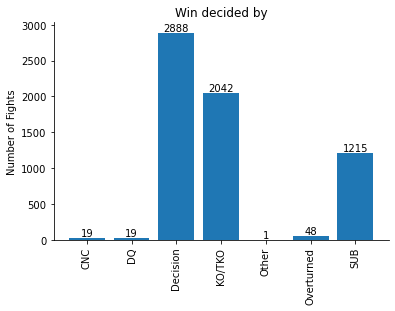

In [21]:
# plot the new data
plot_bar(df_win_types, 'Win Types Adjusted', 'Win decided by')

Other Win decided types are:
- CNC (Could not continue)
- DQ (Disqualification)
- Other
- Overturned
<br>
These fights are fights that had no clear winner, CNC is where a fighter could not continue and no fighter was<br>
declared the winner. DQ is where one fighter was disqualified. Other we can investigate and Overturned is <br>
usually where a decision for the fight was overturned due to mitgating circumstances, usually a failed drug test<br>
after the fight.

In [22]:
# Investigate the Other circumstance in the above
df_other = df_win_types[df_win_types['Win decided by']=='Other']
df_other

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
48,UFC Fight Night: Santos vs. Walker,2021-10-02,Middleweight,NO CONTEST,NO CONTEST,Other,NaN,1,223,Kevin Holland,...,3.0,3.0,1.0,1.0,2.0,4.0,4.0,4.0,3.0,5.0


In [23]:
# Investigate the DQ circumstance in the above
df_other = df_win_types[df_win_types['Win decided by']=='DQ']
df_other

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
265,UFC Fight Night: Reyes vs. Prochazka,2021-05-01,Women's Strawweight,Luana Pinheiro,Randa Markos,DQ,NaN,1,256,Luana Pinheiro,...,6.0,7.0,0.0,1.0,12.0,34.0,5.0,5.0,1.0,1.0
342,UFC 259: Blachowicz vs. Adesanya,2021-03-06,Bantamweight,Aljamain Sterling,Petr Yan,DQ,NaN,4,269,Aljamain Sterling,...,21.0,24.0,17.0,17.0,64.0,106.0,12.0,18.0,10.0,13.0
842,UFC Fight Night: Anderson vs. Blachowicz,2020-02-15,Welterweight,Diego Sanchez,Michel Pereira,DQ,NaN,3,189,Diego Sanchez,...,28.0,33.0,5.0,6.0,39.0,75.0,10.0,11.0,4.0,5.0
844,UFC Fight Night: Anderson vs. Blachowicz,2020-02-15,Lightweight,Brok Weaver,Kazula Vargas,DQ,NaN,1,242,Brok Weaver,...,5.0,10.0,4.0,5.0,9.0,21.0,3.0,5.0,3.0,3.0
1393,UFC Fight Night: Cejudo vs. Dillashaw,2019-01-19,Heavyweight,Allen Crowder,Greg Hardy,DQ,NaN,2,148,Allen Crowder,...,5.0,5.0,3.0,3.0,17.0,51.0,6.0,7.0,6.0,6.0
1794,UFC 222: Cyborg vs. Kunitskaya,2018-03-03,Middleweight,CB Dollaway,Hector Lombard,DQ,NaN,1,300,CB Dollaway,...,2.0,4.0,9.0,11.0,18.0,32.0,1.0,1.0,0.0,0.0
1981,UFC 217: Bisping vs. St-Pierre,2017-11-04,Heavyweight,Mark Godbeer,Walt Harris,DQ,NaN,1,269,Mark Godbeer,...,4.0,7.0,0.0,0.0,5.0,19.0,1.0,1.0,15.0,18.0
2919,UFC Fight Night: Belfort vs Henderson 3,2015-11-07,Lightweight,Abel Trujillo,Gleison Tibau,DQ,Rear Naked Choke,1,105,Abel Trujillo,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,3.0
2967,UFC 191: Johnson vs Dodson 2,2015-09-05,Middleweight,Joe Riggs,Ron Stallings,DQ,NaN,2,148,Joe Riggs,...,2.0,3.0,4.0,4.0,17.0,28.0,4.0,5.0,3.0,3.0
3797,UFC Fight Night: Saffiedine vs Lim,2014-01-04,Welterweight,Kiichi Kunimoto,Luiz Dutra,DQ,NaN,1,177,Kiichi Kunimoto,...,4.0,4.0,1.0,1.0,9.0,17.0,1.0,1.0,0.0,0.0


In [24]:
# Investigate the Other circumstance in the above
df_other = df_win_types[df_win_types['Win decided by']=='CNC']
df_other

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
178,UFC Fight Night: Gane vs. Volkov,2021-06-26,Featherweight,NO CONTEST,NO CONTEST,CNC,NaN,2,46,Andre Fili,...,3.0,4.0,5.0,5.0,15.0,34.0,0.0,0.0,0.0,0.0
223,UFC Fight Night: Rozenstruik vs. Sakai,2021-06-05,Lightweight,NO CONTEST,NO CONTEST,CNC,NaN,2,134,Alan Patrick,...,13.0,17.0,1.0,1.0,11.0,37.0,9.0,13.0,26.0,35.0
327,UFC Fight Night: Edwards vs. Muhammad,2021-03-13,Welterweight,NO CONTEST,NO CONTEST,CNC,NaN,2,18,Leon Edwards,...,1.0,3.0,0.0,0.0,6.0,23.0,2.0,3.0,0.0,0.0
332,UFC Fight Night: Edwards vs. Muhammad,2021-03-13,Middleweight,NO CONTEST,NO CONTEST,CNC,NaN,1,277,Eryk Anders,...,2.0,2.0,6.0,8.0,11.0,38.0,4.0,4.0,0.0,0.0
1026,UFC Fight Night: Rodriguez vs. Stephens,2019-09-21,Featherweight,NO CONTEST,NO CONTEST,CNC,NaN,1,15,Yair Rodriguez,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1040,UFC Fight Night: Cowboy vs. Gaethje,2019-09-14,Heavyweight,NO CONTEST,NO CONTEST,CNC,NaN,1,243,Todd Duffee,...,0.0,0.0,4.0,5.0,14.0,23.0,2.0,6.0,0.0,0.0
2199,UFC 211: Miocic vs. Dos Santos,2017-05-13,Lightweight,NO CONTEST,NO CONTEST,CNC,NaN,2,242,Eddie Alvarez,...,7.0,11.0,5.0,5.0,61.0,127.0,12.0,17.0,0.0,0.0
2345,UFC 207: Nunes vs. Rousey,2016-12-30,Welterweight,NO CONTEST,NO CONTEST,CNC,NaN,1,213,Alex Oliveira,...,6.0,8.0,2.0,2.0,6.0,9.0,6.0,7.0,5.0,7.0
2838,UFC on FOX: Dos Anjos vs. Cowboy 2,2015-12-19,Featherweight,NO CONTEST,NO CONTEST,CNC,NaN,2,94,Cole Miller,...,6.0,11.0,10.0,13.0,24.0,77.0,1.0,2.0,0.0,0.0
2870,UFC Fight Night: Namajunas vs. VanZant,2015-12-10,Middleweight,NO CONTEST,NO CONTEST,CNC,NaN,1,11,Antonio Carlos Junior,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0


In [25]:
# Investigate the Other circumstance in the above
df_other = df_win_types[df_win_types['Win decided by']=='Overturned']
df_other

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
574,UFC Fight Night: Covington vs. Woodley,2020-09-19,Welterweight,NO CONTEST,NO CONTEST,Overturned,NaN,3,300,Donald Cerrone,...,30.0,42.0,40.0,45.0,129.0,284.0,18.0,24.0,3.0,4.0
594,UFC Fight Night: Waterson vs. Hill,2020-09-12,Lightweight,NO CONTEST,NO CONTEST,Overturned,Guillotine Choke,1,31,Roosevelt Roberts,...,1.0,2.0,2.0,2.0,4.0,5.0,0.0,0.0,1.0,1.0
624,UFC Fight Night: Munhoz vs. Edgar,2020-08-22,Catch Weight,NO CONTEST,NO CONTEST,Overturned,Punch,2,119,Timur Valiev,...,3.0,3.0,2.0,3.0,11.0,32.0,1.0,1.0,14.0,17.0
664,UFC Fight Night: Whittaker vs. Till,2020-07-25,Welterweight,NO CONTEST,NO CONTEST,Overturned,Rear Naked Choke,1,168,Nicolas Dalby,...,1.0,4.0,7.0,7.0,21.0,32.0,2.0,5.0,7.0,8.0
724,UFC Fight Night: Blaydes vs. Volkov,2020-06-20,Middleweight,NO CONTEST,NO CONTEST,Overturned,Punches,2,290,Marc-Andre Barriault,...,7.0,8.0,3.0,4.0,33.0,80.0,4.0,4.0,0.0,0.0
758,UFC Fight Night: Woodley vs. Burns,2020-05-30,Light Heavyweight,NO CONTEST,NO CONTEST,Overturned,Knee,1,111,Jamahal Hill,...,1.0,1.0,4.0,4.0,4.0,6.0,1.0,1.0,0.0,0.0
863,UFC 247: Jones vs. Reyes,2020-02-08,Bantamweight,NO CONTEST,NO CONTEST,Overturned,Punch,1,38,Domingo Pilarte,...,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,5.0,5.0
977,UFC Fight Night: Reyes vs. Weidman,2019-10-18,Heavyweight,NO CONTEST,NO CONTEST,Overturned,NaN,3,300,Greg Hardy,...,10.0,18.0,1.0,1.0,26.0,96.0,0.0,1.0,0.0,0.0
1012,UFC 243: Whittaker vs. Adesanya,2019-10-05,Bantamweight,NO CONTEST,NO CONTEST,Overturned,Arm Triangle,3,180,Khalid Taha,...,8.0,11.0,3.0,6.0,10.0,31.0,1.0,1.0,9.0,18.0
1140,UFC Fight Night: De Randamie vs. Ladd,2019-07-13,Light Heavyweight,NO CONTEST,NO CONTEST,Overturned,NaN,3,300,Mike Rodriguez,...,10.0,14.0,7.0,8.0,31.0,94.0,9.0,15.0,15.0,19.0


From the above we can see that the Fights in the CNC, Other and Overturned were  declared a no contest<br>
and no winner was decided. Where as the DQ had a winner announced. <br>

In [26]:
# check the % of these fights from the total number of fights
wt_check = len(df_win_types[df_win_types['Win decided by'].str.contains('Other',na=False) | 
                        df_win_types['Win decided by'].str.contains('Overturned',na=False) |
                        df_win_types['Win decided by'].str.contains('CNC',na=False)])

all_count = len(df_win_types)
percent_of_fights = round((wt_check / all_count)*100,2)
print('CNC, Other and Overturned as % of all UFC fights: '+ str(percent_of_fights) +'%')

CNC, Other and Overturned as % of all UFC fights: 1.09%


All these methods of a fight finishing account for 1.09% of all the UFC fights after cleaning the weight classes<br>
These methods of decision won't help in the analysis of the fights as there was no clear winner announced.<br>
Therefore we can rremove them from the clean dataset.

In [27]:
# filtering out the unneeded Win by types
win_types_df_1 = df_win_types[~df_win_types['Win decided by'].str.contains('Other',na=False) & 
                        ~df_win_types['Win decided by'].str.contains('Overturned',na=False) &
                        ~df_win_types['Win decided by'].str.contains('CNC',na=False)]

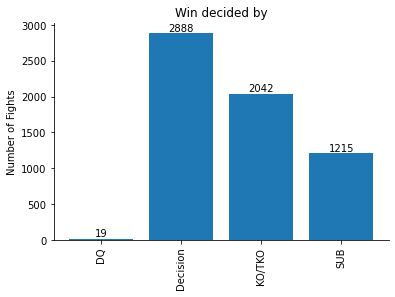

In [28]:
# plot the new data
plot_bar(win_types_df_1, 'Win Types Adjusted Final', 'Win decided by')

## WIN METHODS

Win methods are a sub category of how the win types and are the in fight actions that determined a win type

In [29]:
# create a copy of the finalised win type dataframe
win_method_df = win_types_df_1.copy()

In [30]:
# view the head
win_method_df.head()

,Event,Date,Weight class,Winner,Loser,Win decided by,Win Method,Round,Time,Fighter 1,...,Body landed F_2,Body thrown F_2,Leg landed F_2,Leg thrown F_2,Distance landed F_2,Distance thrown F_2,Clinch landed F_2,Clinch thrown F_2,Ground landed F_2,Ground thrown F_2
0,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Light Heavyweight,Glover Teixeira,Jan Blachowicz,SUB,Rear Naked Choke,2,182,Glover Teixeira,...,6.0,6.0,2.0,2.0,26.0,43.0,1.0,1.0,1.0,1.0
1,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Bantamweight,Petr Yan,Cory Sandhagen,Decision,Unanimous Decision,5,300,Petr Yan,...,28.0,32.0,23.0,24.0,168.0,443.0,1.0,2.0,0.0,0.0
2,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Lightweight,Islam Makhachev,Dan Hooker,SUB,Kimura,1,145,Islam Makhachev,...,0.0,0.0,3.0,3.0,4.0,13.0,0.0,0.0,0.0,0.0
3,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Heavyweight,Alexander Volkov,Marcin Tybura,Decision,Unanimous Decision,3,300,Alexander Volkov,...,15.0,17.0,4.0,5.0,47.0,121.0,11.0,18.0,0.0,0.0
4,UFC 267: Blachowicz vs. Teixeira,2021-10-30,Welterweight,Khamzat Chimaev,Li Jingliang,SUB,Rear Naked Choke,1,196,Khamzat Chimaev,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
# get the data info
win_method_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 6235
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event                  6164 non-null   object 
 1   Date                   6164 non-null   object 
 2   Weight class           6164 non-null   object 
 3   Winner                 6164 non-null   object 
 4   Loser                  6164 non-null   object 
 5   Win decided by         6164 non-null   object 
 6   Win Method             6017 non-null   object 
 7   Round                  6164 non-null   int64  
 8   Time                   6164 non-null   int64  
 9   Fighter 1              6164 non-null   object 
 10  Height F_1             6161 non-null   float64
 11  Weight F_1             6162 non-null   float64
 12  Reach F_1              5941 non-null   float64
 13  Stance F_1             6152 non-null   object 
 14  Wins F_1               6164 non-null   int64  
 15  Loss

In [32]:
# Find the unique values in the method column
win_method_df['Win Method'].unique()

array(['Rear Naked Choke', 'Unanimous Decision', 'Kimura', 'Punch',
       'Knee', 'Arm Triangle', 'Split Decision', 'Majority Decision',
       'Punches', 'Anaconda Choke', 'Armbar', 'Elbow', 'Kick',
       "D'Arce Choke", 'Elbows', 'Heel Hook', 'Guillotine Choke',
       'Flying Knee', nan, 'Triangle Armbar', 'Spinning Back Elbow',
       'Ankle Lock', 'Von Flue Choke', 'Triangle Choke', 'Slam',
       'Forearm Choke', 'Injury', 'Spinning Back Kick', 'Scarf Hold',
       'Spinning Back Fist', 'Kneebar', 'Knees', 'Twister',
       'Peruvian Necktie', 'Neck Crank', 'Schultz Front Headlock',
       'Bulldog Choke', 'Suloev Stretch', 'Kicks', 'Ezekiel Choke',
       'Omoplata', 'Calf Slicer', 'North-South Choke',
       'Inverted Triangle', 'Straight Armbar', 'Keylock',
       'Pace/Pillory Choke', 'Other - Lock', 'Toe Hold', 'Shoulder Choke',
       'Other', 'Other - Choke'], dtype=object)

In [33]:
# Show the number of each unique method
win_method_unique = win_method_df.groupby('Win Method')['Win Method'].count()
win_method_unique

Win Method
Anaconda Choke              24
Ankle Lock                   7
Arm Triangle                79
Armbar                     159
Bulldog Choke                6
Calf Slicer                  2
D'Arce Choke                32
Elbow                       32
Elbows                      90
Ezekiel Choke                2
Flying Knee                 30
Forearm Choke                2
Guillotine Choke           215
Heel Hook                   18
Injury                       8
Inverted Triangle            2
Keylock                      4
Kick                       155
Kicks                        7
Kimura                      38
Knee                        87
Kneebar                     13
Knees                       28
Majority Decision           73
Neck Crank                   9
North-South Choke            5
Omoplata                     2
Other                        3
Other - Choke                1
Other - Lock                 2
Pace/Pillory Choke           1
Peruvian Necktie            

In [34]:
# count NaN values in the Method column
nan_count = win_method_df['Win Method'].isna().sum()
print('Count of NaN values in Win Method Column: ' + str(nan_count))

Count of NaN values in Win Method Column: 147


In [35]:
# % of Win Method that are NaN for the Fight Win Method
count = len(win_method_df)
percent_nan = round((nan_count / count) * 100, 2)
print('% of NaN values in Win Method Column: ' + str(percent_nan)+'%')

% of NaN values in Win Method Column: 2.38%


In [36]:
# find what win decided by type the NaN values are
nan_count = win_method_df['Win Method'].isna().groupby(win_method_df['Win decided by']).sum()
nan_count

Win decided by
DQ           18
Decision      0
KO/TKO      129
SUB           0
Name: Win Method, dtype: int64

To deal with the DQ (disqualified) NaN's in the win method column we can simply replace NaN with "Disqualified"<br>
We can do this because the disqualified metric doesn't tell us the reason for disqualification.

In [37]:
# Replace NaN's in the Win Method for each fight ending in DQ
win_method_df['Win Method'] = np.where(win_method_df['Win decided by']=='DQ', 'Disqualified',win_method_df['Win Method'])

In [38]:
# Check the nan_count again
nan_count = win_method_df['Win Method'].isna().groupby(win_method_df['Win decided by']).sum()
nan_count

Win decided by
DQ            0
Decision      0
KO/TKO      129
SUB           0
Name: Win Method, dtype: int64

Now check the distribution of types of win for KO/TKO to see how to handle the missing values

In [39]:
# Filter just the KO/TKO win decided by type
win_method_ko = win_method_df[win_method_df['Win decided by'].str.contains('KO/TKO', na=False)]

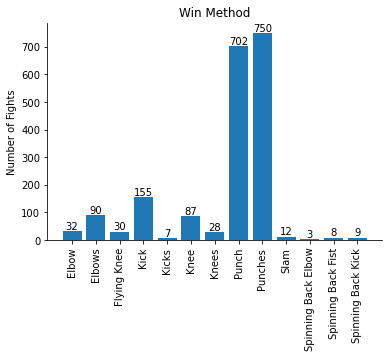

In [40]:
# plot the new data
plot_bar(win_method_ko, 'Win Types For KO_TKO', 'Win Method')

First thing we can see here is that Punches or Punch are a far more common method of KO/TKO than anything else<br>
The next nearest is Kick and then Elbow. We can also see from the graph that we have items that can be grouped<br>
together to make the data set cleaner such as Elbow/Elbows, Kick/Kicks, Knee/Knees and Punch/Punches.<br>
<br>
Renaming these will clean the data set more before we try to deal with the NaN's.

In [41]:
# Renaming the win method for punches, kicks, knees, elbows
win_method_df['Win Method'] = win_method_df['Win Method'].str.replace('Elbows','Elbow')
win_method_df['Win Method'] = win_method_df['Win Method'].str.replace('Kicks', 'Kick')
win_method_df['Win Method'] = win_method_df['Win Method'].str.replace('Knees', 'Knee')
win_method_df['Win Method'] = win_method_df['Win Method'].str.replace('Punches', 'Punch')

Now Recheck the distribution to make sure its correct.

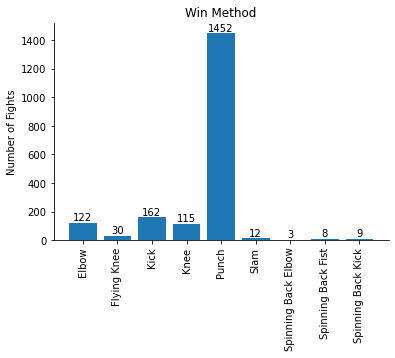

In [42]:
# Filter just the KO/TKO win decided by type
win_method_ko = win_method_df[win_method_df['Win decided by'].str.contains('KO/TKO', na=False)]
# plot the new data
plot_bar(win_method_ko, 'Win Types For KO_TKO Adjusted', 'Win Method')

Now we are ready to deal with the NaN values more comprehensively. There are a few options available based on <br>
the distribution of the win methods for KO/TKO<br>
<br>
We can try:
- Randomly assigning Method to each of the NaNs
- Using a prediction method to try predict and check the accuracy
- Increase each one by an amount relative to its % of the method distribution
<br>

First trying the random assign method. Using Numpy we can randonly assign from a list 

In [43]:
# create list of methods available
choice_list = list(win_method_ko['Win Method'].unique())

# remove the NaN value
choices = [item for item in choice_list if not(pd.isnull(item)) == True]
choices

['Punch',
 'Knee',
 'Elbow',
 'Kick',
 'Flying Knee',
 'Spinning Back Elbow',
 'Slam',
 'Spinning Back Kick',
 'Spinning Back Fist']

In [44]:
# assign choices randomly to the NaN values
win_method_ko_random = win_method_ko.copy()
win_method_ko_random['Win Method'] = np.where(win_method_ko_random['Win Method'].isnull(),
                                              np.random.choice(choices, size=(len(win_method_ko))),
                                              win_method_ko_random['Win Method'])


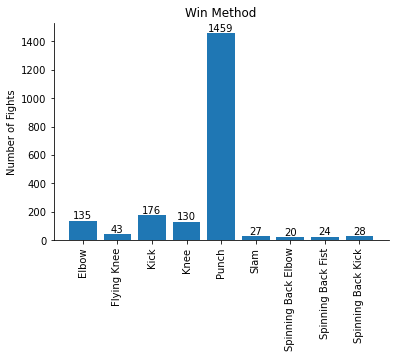

In [45]:
# plot the new data
plot_bar(win_method_ko_random, 'Win Types For KO_TKO Adjusted Randomly', 'Win Method')

Next we can attempt a prediction classification using random forest algotrithim

In [46]:
# make duplicate of win_method_ko dataframe
win_method_rf = win_method_ko.copy()

# remove any of the nan values from the win method column
win_method_rf = win_method_rf[win_method_rf['Win Method'].notnull()]

# check to see if we have any NaNs
nan_count = win_method_rf['Win Method'].isna().groupby(win_method_rf['Win decided by']).sum()
nan_count

Win decided by
KO/TKO    0
Name: Win Method, dtype: int64

Because KO/TKO would normally involve strikes to the head, or body we will inlcude these strikes,<br>
as well as relevant event information.

In [47]:
# reindex the columns that we will use for the classifier
win_method_rf = win_method_rf.reindex(columns=['Weight class','Sig. str. landed F_1', 'Sig. str. thrown F_1',
                                               'Sig. str. landed F_2', 'Sig. str. thrown F_2', 
                                               'Head landed F_1', 'Head thrown F_1', 'Head landed F_2',
                                               'Head thrown F_2', 'Body landed F_1', 'Body thrown F_1',
                                               'Body landed F_2', 'Body thrown F_2','Win Method'])

In [48]:
# create our feautures list
features = win_method_rf.columns[:12]
features


Index(['Weight class', 'Sig. str. landed F_1', 'Sig. str. thrown F_1',
       'Sig. str. landed F_2', 'Sig. str. thrown F_2', 'Head landed F_1',
       'Head thrown F_1', 'Head landed F_2', 'Head thrown F_2',
       'Body landed F_1', 'Body thrown F_1', 'Body landed F_2'],
      dtype='object')

In [49]:
# factorize the columns
win_method_rf['Weight class'] = pd.factorize(win_method_rf['Weight class'])[0]


win_method_rf.head()

,Weight class,Sig. str. landed F_1,Sig. str. thrown F_1,Sig. str. landed F_2,Sig. str. thrown F_2,Head landed F_1,Head thrown F_1,Head landed F_2,Head thrown F_2,Body landed F_1,Body thrown F_1,Body landed F_2,Body thrown F_2,Win Method
10,0,32.0,55.0,35.0,67.0,27.0,48.0,16.0,45.0,5.0,7.0,13.0,16.0,Punch
11,1,4.0,5.0,4.0,6.0,4.0,5.0,3.0,5.0,0.0,0.0,1.0,1.0,Knee
19,0,11.0,21.0,7.0,21.0,8.0,18.0,5.0,19.0,0.0,0.0,2.0,2.0,Punch
20,2,68.0,90.0,56.0,109.0,53.0,73.0,50.0,103.0,15.0,16.0,0.0,0.0,Punch
24,3,24.0,46.0,11.0,21.0,21.0,40.0,5.0,13.0,1.0,1.0,1.0,1.0,Punch


In [50]:
# factorize the win method
y = pd.factorize(win_method_rf['Win Method'])[0]
y

array([0, 1, 0, ..., 0, 2, 1])

In [51]:
# check the lenght of the factorized and features 
print('Size of y: ' + str(len(y)) + ' Size of features: ' + str(len(win_method_rf)))

Size of y: 1913 Size of features: 1913


In [52]:
# import train test from sklearn
from sklearn.model_selection import train_test_split

# create the test and train sets
x_train, x_test, y_train, y_test = train_test_split(win_method_rf[features], y, test_size=0.1)

In [53]:
# check the size of x_train and x_test
print('Size of x_train: ' + str(len(x_train)) +  ', Size of x_test: ' + str(len(x_test)))

Size of x_train: 1721, Size of x_test: 192


In [54]:
# check the contents of the x_train
x_train.head()

,Weight class,Sig. str. landed F_1,Sig. str. thrown F_1,Sig. str. landed F_2,Sig. str. thrown F_2,Head landed F_1,Head thrown F_1,Head landed F_2,Head thrown F_2,Body landed F_1,Body thrown F_1,Body landed F_2
3968,6,14.0,27.0,41.0,66.0,8.0,19.0,21.0,44.0,6.0,7.0,18.0
5757,6,18.0,26.0,8.0,17.0,14.0,22.0,3.0,12.0,2.0,2.0,3.0
1089,0,64.0,137.0,18.0,60.0,44.0,114.0,16.0,54.0,11.0,14.0,2.0
2493,3,14.0,37.0,6.0,12.0,10.0,26.0,4.0,9.0,1.0,6.0,0.0
4469,6,64.0,113.0,29.0,62.0,57.0,105.0,15.0,48.0,7.0,8.0,6.0


In [55]:
# check the contents of the y_train
y_train

array([3, 0, 0, ..., 0, 3, 0])

In [56]:
# import the classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier
clf = RandomForestClassifier(n_estimators=20)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [57]:
# Get the accuracy against the test data
clf.score(x_test, y_test)

0.7916666666666666

In [58]:
# plot a confusion matrix to visualise
from sklearn.metrics import confusion_matrix

y_predicted = clf.predict(x_test)

confusion = confusion_matrix(y_test, y_predicted)
confusion

array([[151,   1,   3,   1,   0,   0,   0],
       [  7,   0,   0,   1,   0,   0,   0],
       [ 11,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   1,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0]])

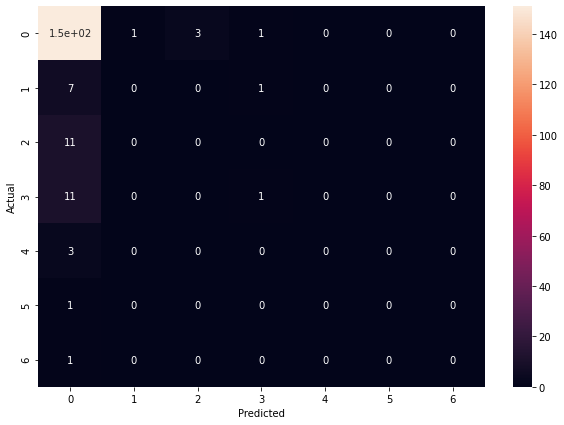

In [59]:
# plot the above with seaborn to get better understanding
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(confusion, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../graphs/rf_confusion_matrix.png', bbox_inches="tight", dpi=150)
plt.show()

After making multiple adjustments to the parameters of the classifier and running several times the accuracy was between 74% and 78%. For the shape of the data, a classification prediction doesn't fit well. In the above matrix classification other than Punches was not at an accurate enough level to use to impute null values

The third method will now be tested by increasing each attribute by its relative percentage. <br>
This should maintain the shape of the data.

In [60]:
# make a duplicate of the win_method_ko data frame
win_method_pinc = win_method_ko.copy()

In [61]:
# get the number of each type
punch = len(win_method_pinc[win_method_pinc['Win Method']=='Punch'])
knee = len(win_method_pinc[win_method_pinc['Win Method']=='Knee'])
elbow = len(win_method_pinc[win_method_pinc['Win Method']=='Elbow'])
kick = len(win_method_pinc[win_method_pinc['Win Method']=='Kick'])
flying_knee = len(win_method_pinc[win_method_pinc['Win Method']=='Flying Knee'])
spinning_back_elbow = len(win_method_pinc[win_method_pinc['Win Method']=='Spinning Back Elbow'])
slam = len(win_method_pinc[win_method_pinc['Win Method']=='Slam'])
spinning_back_kick = len(win_method_pinc[win_method_pinc['Win Method']=='Spinning Back Kick'])
spinning_back_fist = len(win_method_pinc[win_method_pinc['Win Method']=='Spinning Back Fist'])

# total
total_methods = (punch + knee + elbow + kick + flying_knee + spinning_back_elbow + 
                slam + spinning_back_kick + spinning_back_fist)

# null value count
null_ko = win_method_pinc['Win Method'].isna().sum()

In [62]:
# print out the values

print("Total number of methods with null removed: " + str(total_methods))
print("Punch: " + str(punch) + " " + str(round((punch/total_methods)*100,2)) +"%")
print("Knee: " + str(knee) + " " + str(round((knee/total_methods)*100,2)) +"%")
print("Elbow: " + str(elbow) + " " + str(round((elbow/total_methods)*100,2)) +"%")
print("Kick: " + str(kick) + " " + str(round((kick/total_methods)*100,2)) +"%")
print("Flying Knee: " + str(flying_knee) + " " + 
      str(round((flying_knee/total_methods)*100,2)) +"%")
print("Spinning Back Elbow: " + str(spinning_back_elbow) + " " + 
      str(round((spinning_back_elbow/total_methods)*100,2)) +"%")
print("Slam: " + str(slam) + " " + str(round((slam/total_methods)*100,2)) +"%")
print("Spinning Back Kick: " + str(spinning_back_kick) + " " + 
      str(round((spinning_back_kick/total_methods)*100,2)) +"%")
print("Spinning Back Fist: " + str(spinning_back_fist) + " " + 
      str(round((spinning_back_fist/total_methods)*100,2)) +"%")
print("Count of Nulls: " + str(null_ko))

Total number of methods with null removed: 1913
Punch: 1452 75.9%
Knee: 115 6.01%
Elbow: 122 6.38%
Kick: 162 8.47%
Flying Knee: 30 1.57%
Spinning Back Elbow: 3 0.16%
Slam: 12 0.63%
Spinning Back Kick: 9 0.47%
Spinning Back Fist: 8 0.42%
Count of Nulls: 129


Using the percentages above we can see how many to add for each method. <br>
For the Spinning Back Elbow we can use 0, for the Spinning Back Fist we can also use 0<br>
This makes sure we get the same amount as the amount of nulls to fill in. <br>
We will also round the percentages<br>

In [63]:
# get the values in regards to the null values
punch_adj = round((null_ko/100) * 75.9)
knee_adj = round((null_ko/100) * 6.01)
elbow_adj = round((null_ko/100) * 6.38)
kick_adj = round((null_ko/100) * 8.47)
flying_knee_adj = round((null_ko/100) * 1.57)
spin_elbow_adj = round((null_ko/100) * 0)
slam_adj = round((null_ko/100) * 0.63)
spin_bkick_adj = round((null_ko/100) * 0.47)
spin_bfist_adj = round((null_ko/100) * 0)

print("Punches to add: " + str(punch_adj) + "\n" +
      "Knees to add: " + str(knee_adj) + "\n" +
      "Elbow to add: " + str(elbow_adj) + "\n" +
      "Kick to add: " + str(kick_adj) + "\n" +
      "Flying Knee to add: " + str(flying_knee_adj) + "\n" +
      "Slam to add: " + str(slam_adj) + "\n" +
      "Spinning Back Elbow to add: " + str(spin_elbow_adj) + "\n" +
      "Spinning Back Kick to add: " + str(spin_bkick_adj) + "\n" +
      "Spinning Back Fist to add: " + str(spin_bfist_adj) + "\n" +
      "Total: " + str(punch_adj + knee_adj + elbow_adj + 
                      kick_adj + flying_knee_adj + spin_elbow_adj + 
                      slam_adj + spin_bkick_adj + spin_bfist_adj))



Punches to add: 98
Knees to add: 8
Elbow to add: 8
Kick to add: 11
Flying Knee to add: 2
Slam to add: 1
Spinning Back Elbow to add: 0
Spinning Back Kick to add: 1
Spinning Back Fist to add: 0
Total: 129


In [64]:
# create dataframe of adjusted methods
ko_method_punch = pd.concat([pd.DataFrame(['Punch'], 
                       columns=['Method'])for n in range(punch_adj)], ignore_index=True)

ko_method_knee = pd.concat([pd.DataFrame(['Knee'], 
                       columns=['Method'])for n in range(knee_adj)], ignore_index=True)

ko_method_elbow = pd.concat([pd.DataFrame(['Elbow'], 
                       columns=['Method'])for n in range(elbow_adj)], ignore_index=True)

ko_method_kick = pd.concat([pd.DataFrame(['Kick'], 
                       columns=['Method'])for n in range(kick_adj)], ignore_index=True)

ko_method_flying_knee = pd.concat([pd.DataFrame(['Flying Knee'], 
                       columns=['Method'])for n in range(flying_knee_adj)], ignore_index=True)

ko_method_slam = pd.concat([pd.DataFrame(['Slam'], 
                       columns=['Method'])for n in range(slam_adj)], ignore_index=True)

ko_method_spin_kick = pd.concat([pd.DataFrame(['Spinning Back Kick'], 
                       columns=['Method'])for n in range(spin_bkick_adj)], ignore_index=True)


ko_method = pd.concat([ko_method_punch, ko_method_knee,
                       ko_method_elbow, ko_method_kick,
                       ko_method_flying_knee,ko_method_slam,
                       ko_method_spin_kick])
ko_method = ko_method['Method'].values.tolist()
ko_method

['Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Punch',
 'Knee',
 'Knee',
 '

In [65]:
# Set the NaN values in the win_method_pinc to the values create
win_method_pinc.loc[win_method_pinc['Win Method'].isnull(), 'Win Method'] = ko_method

In [66]:
# null value count
null_ko = win_method_pinc['Win Method'].isna().sum()
print('Null value count now in Win Methods: ' + str(null_ko))

Null value count now in Win Methods: 0


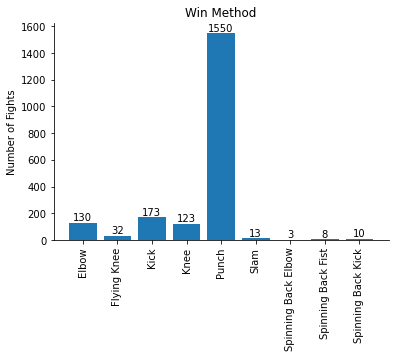

In [67]:
# plot the new data
plot_bar(win_method_pinc, 'Win Types For KO_TKO % increase', 'Win Method')

In [68]:
# Display all graphs beside each other for methods
import matplotlib.image as mpimg
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 22 ,8


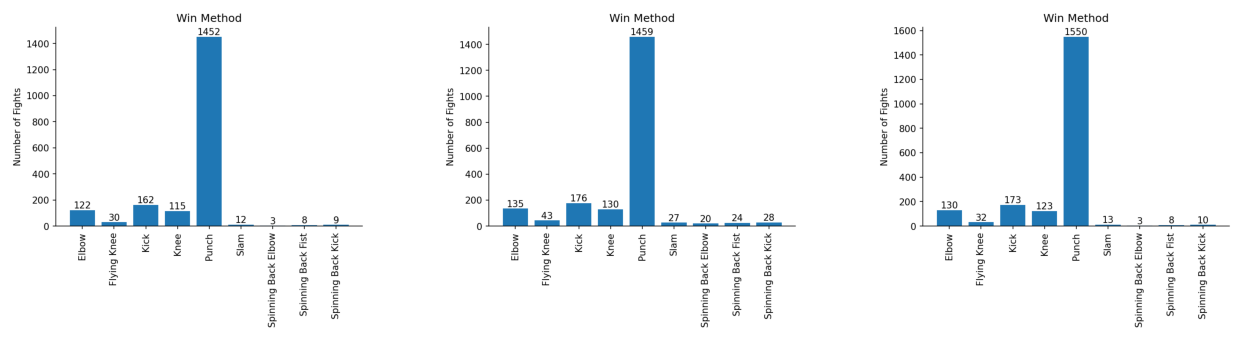

In [69]:
# read images
img_A = mpimg.imread('../graphs/Win Types For KO_TKO Adjusted.png')
img_B = mpimg.imread('../graphs/Win Types For KO_TKO Adjusted Randomly.png')
img_C = mpimg.imread('../graphs/Win Types For KO_TKO % increase.png')

# display images
fig, ax = plt.subplots(1,3)

#hide axes and borders
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

# show graphs
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)

In the above graphs we have the original with the missing values, then where random choices where made<br>
for the win method and next where the relative percentage was used. The RandomForest classifier isn't<br>
displayed as the models accuracy wasn't high enough to be considered. 

Because the random method givesa a higher output on the less likely scenarios. I will proceed with using <br>
the relative percentage method for imputing the NaN values.

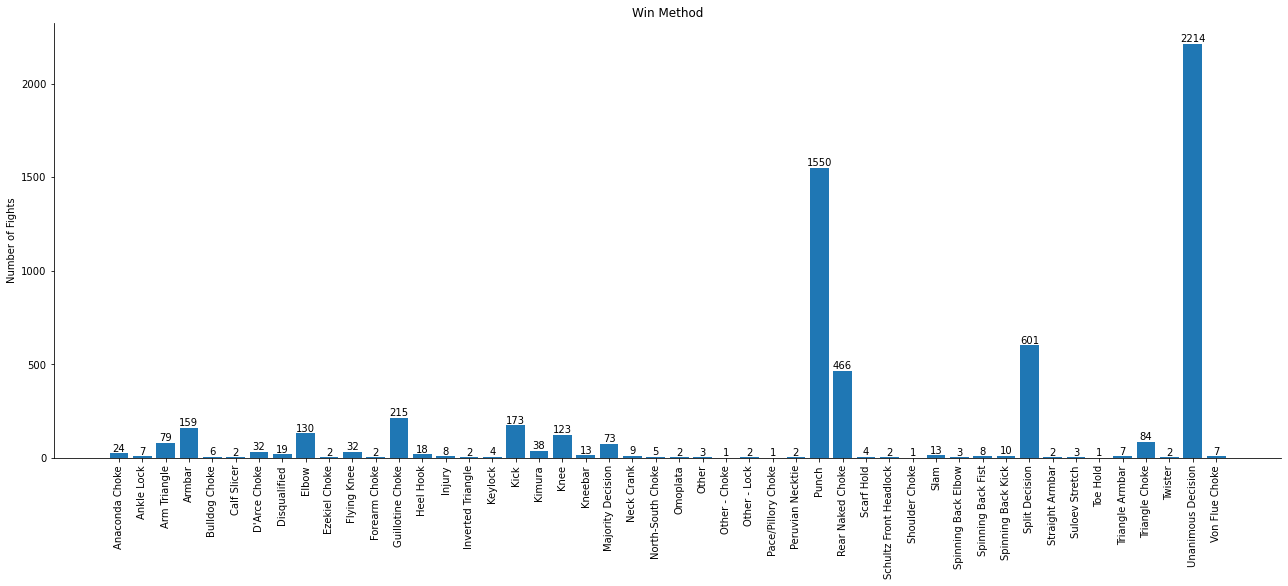

In [71]:
# fill the NaN values in the main data frame
win_method_df.loc[win_method_df['Win Method'].isnull(), 'Win Method'] = ko_method

# display the newly adjusted data
plot_bar(win_method_df, 'Win Types Adjusted Final', 'Win Method')

In [72]:
# check to see if we have any NaNs
nan_count = win_method_df['Win Method'].isna().groupby(win_method_df['Win decided by']).sum()
nan_count

Win decided by
DQ          0
Decision    0
KO/TKO      0
SUB         0
Name: Win Method, dtype: int64